<a href="https://colab.research.google.com/github/deigo-lps/Image-Processing/blob/main/Atividade_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image
from skimage.filters import threshold_otsu
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def op_morfologica(binary_array, estruturante, op):
    # pega dimensções da imagem
    img_linhas, img_colunas = binary_array.shape
    # pega dimenções do elemento estruturante
    el_linhas, el_colunas = estruturante.shape

    # Adiciona preenchimento na imagem
    padding_x = el_linhas // 2
    padding_y = el_colunas // 2
    img_preenchida = np.pad(
        binary_array, ((padding_y, padding_y), (padding_x, padding_x)), 'constant')

    output_img = np.zeros_like(binary_array)

    for i in range(padding_y, img_linhas + padding_y):
        for j in range(padding_x, img_colunas + padding_x):
            vizinhanca = img_preenchida[i-padding_y:i +
                                        padding_y+1, j-padding_x:j+padding_x+1]
            if op == 'erosion':
                if np.all(np.logical_and(vizinhanca, estruturante)):
                    output_img[i-padding_y, j-padding_x] = 1
            elif op == 'dilation':
                if np.any(np.logical_and(vizinhanca, estruturante)):
                    output_img[i-padding_y, j-padding_x] = 1

    return output_img

In [ ]:
img = np.array(Image.open('tecido.bmp').convert('L'))

In [ ]:
threshold = threshold_otsu(img)
print("Limiar: ",threshold)

Limiar:  189


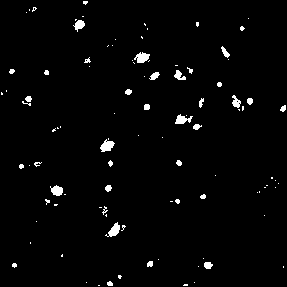

In [ ]:
binary_array = img < threshold
Image.fromarray(binary_array).show()

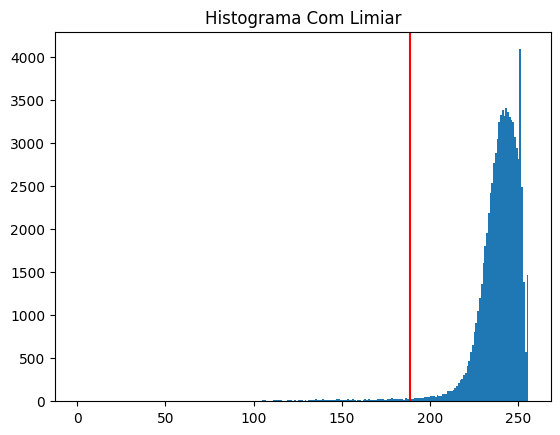

In [ ]:
plt.hist(img.flatten(),bins=256,range=(0, 256))
plt.title("Histograma Com Limiar")
plt.axvline(threshold,color='r')
plt.show()

In [ ]:
estruturante = np.array([[1, 1, 1, 1, 1],
                         [1, 1, 1, 1, 1],
                         [1, 1, 1, 1, 1],
                         [1, 1, 1, 1, 1],
                         [1, 1, 1, 1, 1],])

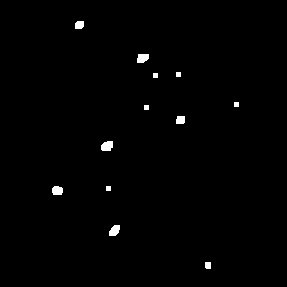

In [ ]:
Image.fromarray(op_morfologica(op_morfologica(binary_array, estruturante,'erosion'), estruturante, 'dilation')).show()